# Main Dashboard of PhD experiments in pre silicon

In [1]:
%matplotlib inline
results_file = 'presilicon_results.csv'
import os
from pca.analytics import *
from pre_silicon.presi_data_gen import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

# Characterization of worklaods based on instructions kind

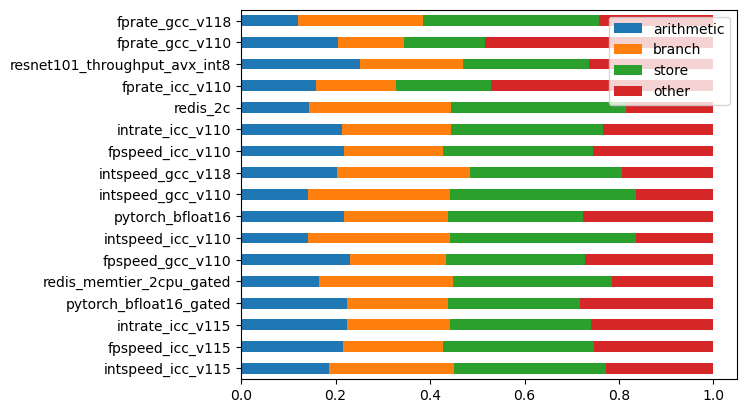

                        test_name  arithmetic    branch     store     other
0               intspeed_icc_v115    0.185211  0.265828  0.322163  0.226798
1                fpspeed_icc_v115    0.216477  0.211054  0.319204  0.253265
2                intrate_icc_v115    0.224198  0.218006  0.299543  0.258253
3          pytorch_bfloat16_gated    0.224792  0.213286  0.279163  0.282758
4        redis_memtier_2cpu_gated    0.164149  0.283461  0.336856  0.215534
5                fpspeed_gcc_v110    0.231113  0.203147  0.294531  0.271209
6               intspeed_icc_v110    0.142368  0.300834  0.393578  0.163219
7                pytorch_bfloat16    0.218102  0.219973  0.286371  0.275553
8               intspeed_gcc_v110    0.142060  0.300718  0.394037  0.163185
9               intspeed_gcc_v118    0.203160  0.281759  0.321229  0.193852
10               fpspeed_icc_v110    0.217222  0.211020  0.316314  0.255443
11               intrate_icc_v110    0.213217  0.230732  0.321994  0.234057
12          

In [2]:
files = dir_list = os.listdir("tests/pre_silicon_runs_global")
my_labels = ['arithmetic', 'branch', 'store', 'other']
df_global = pd.DataFrame(columns=my_labels)
for file_name in files:
    test_name = file_name
    df = read_histogram(os.path.join("tests/pre_silicon_runs_global",file_name))
    df_sumary = calcualte_values(df)
    df_global.loc[test_name] = df_sumary['probability'].values.tolist()

plot_stacked_bar(df_global)

df_global.reset_index(inplace=True)
df_global = df_global.rename(columns={"index": "test_name"} )

print(df_global)

df_global.to_csv(results_file)

                        test_name  arithmetic    branch     store     other
0               intspeed_icc_v115    0.492435  0.778344  0.677910  0.198606
1                fpspeed_icc_v115    0.728161  0.435864  0.664651  0.281241
2                intrate_icc_v115    0.786374  0.479334  0.576541  0.296814
3          pytorch_bfloat16_gated    0.790851  0.449824  0.485214  0.373323
4        redis_memtier_2cpu_gated    0.333641  0.888596  0.743752  0.163440
5                fpspeed_gcc_v110    0.838508  0.386426  0.554081  0.337265
6               intspeed_icc_v110    0.169426  0.997222  0.997945  0.000106
7                pytorch_bfloat16    0.740414  0.491635  0.517515  0.350827
8               intspeed_gcc_v110    0.167102  0.996494  1.000000  0.000000
9               intspeed_gcc_v118    0.627755  0.877955  0.673723  0.095747
10               fpspeed_icc_v110    0.733780  0.435655  0.651699  0.288042
11               intrate_icc_v110    0.703579  0.558904  0.677152  0.221272
12          

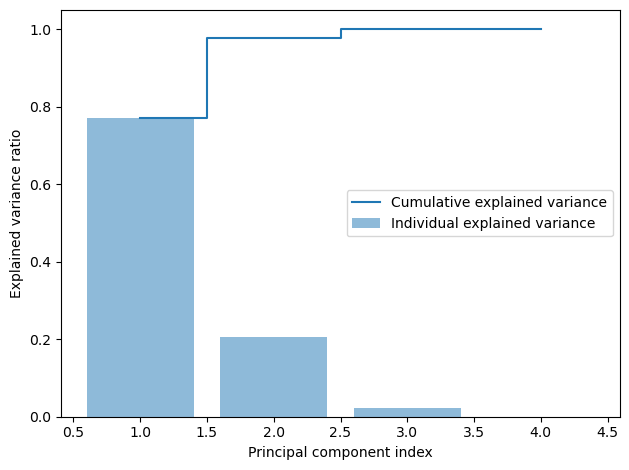

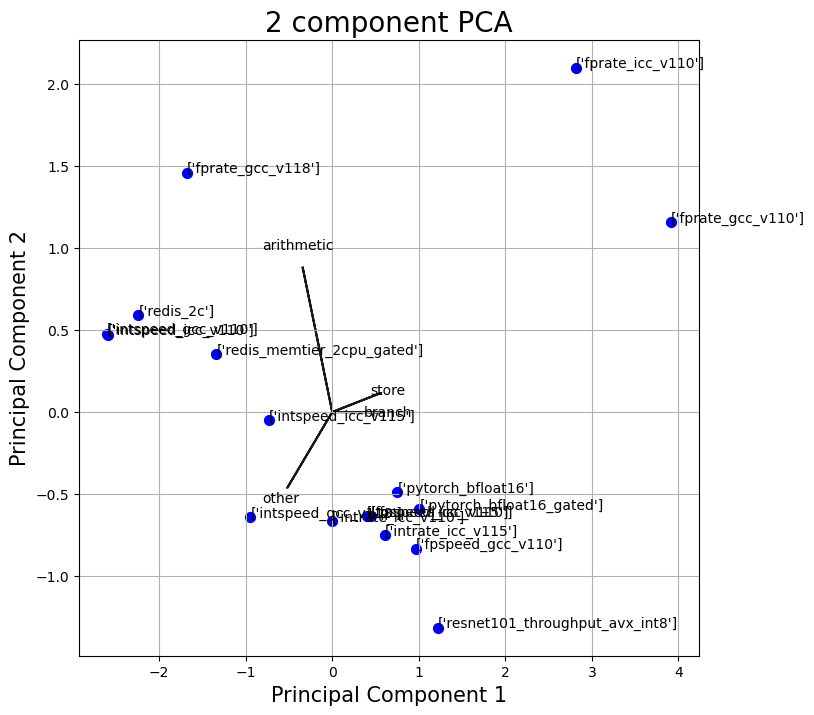

In [3]:
df = df_global

df_ = df.loc[:, df.columns != 'test_name']
df_ = (df_-df_.min())/(df_.max()-df_.min())
extracted_col = df["test_name"]
df_.insert(0, 'test_name', extracted_col)
df_.set_index('test_name')
df_.to_csv('normalized_df.csv')
df = df_

features = list(df.columns)[1:]
test_column = list(df.columns)[0]

pca_df = get_PCA(df, features, test_column)


# Plot characteristics of the worklaods

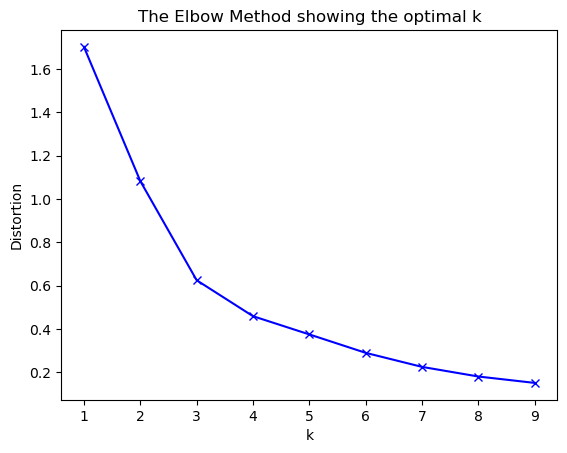

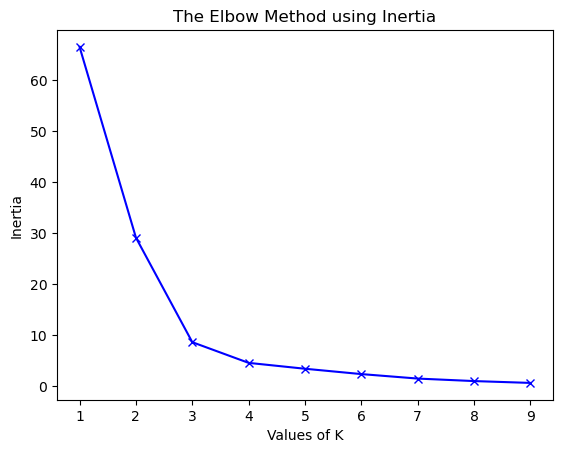

3


In [4]:
if os.path.exists("pca.csv"):    
    clusters = calculate_elbow(pd.read_csv("pca.csv"))

In [5]:
print(f'Optimal number of clusters = {clusters}')

Optimal number of clusters = 3


## Clasification based on optimal number of clusters

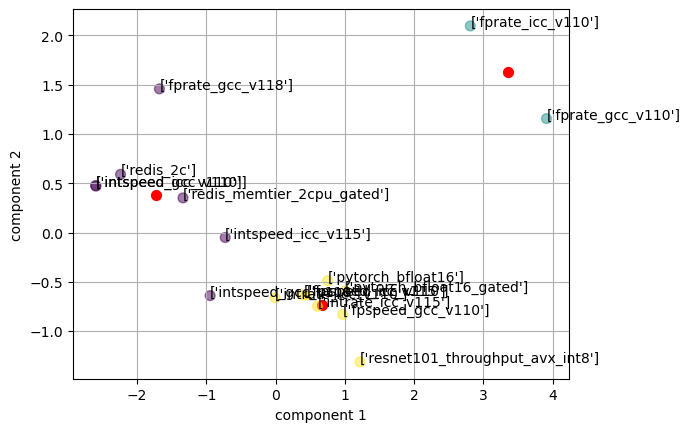

   PRED                      test_name
0     0              intspeed_icc_v115
0     0       redis_memtier_2cpu_gated
0     0              intspeed_icc_v110
0     0              intspeed_gcc_v110
0     0              intspeed_gcc_v118
0     0                       redis_2c
0     0                fprate_gcc_v118
1     1                fprate_icc_v110
1     1                fprate_gcc_v110
2     2               fpspeed_icc_v115
2     2               intrate_icc_v115
2     2         pytorch_bfloat16_gated
2     2               fpspeed_gcc_v110
2     2               pytorch_bfloat16
2     2               fpspeed_icc_v110
2     2               intrate_icc_v110
2     2  resnet101_throughput_avx_int8


In [6]:
df_result,kmeans = kmean_cluster("pca.csv",clusters)
print(df_result)

# Get the test cases closer to centroid

In [7]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
pca_df.iloc[closest]

,Unnamed: 0,principal component 1,principal component 2,test_name
4,4,-1.337614,0.351373,redis_memtier_2cpu_gated
13,13,2.811817,2.097048,fprate_icc_v110
2,2,0.603908,-0.748665,intrate_icc_v115
